<a href="https://colab.research.google.com/github/lbhnsh/3D-Reconstruction/blob/Final/YOLO_SAM(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [ ]:
!pip install roboflow ultralytics

In [ ]:
import ultralytics
from IPython.display import display, Image
from roboflow import Roboflow
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
ultralytics.checks()

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/107.7 GB disk)


In [ ]:
first_run = True
if first_run:
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-5vj7zp36
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-5vj7zp36
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=4786bf520242eb577e29e7e8b5f5beaac4b3110fc8b806a96ae5c9e3944b7265
  Stored in directory: /tmp/pip-ephem-wheel-cache-dx2_slxb/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2023-11-06 17:28:28--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.31, 18.173.166.48, 18.173.166.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173

## Load Dataset

In [ ]:
rf = Roboflow(api_key="TiDutAHJ9j2upJPXrCtI")
project = rf.workspace("vkr-v2").project("vkrrr")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to VKRRR-5 in yolov8:: 100%|██████████| 6844/6844 [00:02<00:00, 2295.90it/s]


## Set YOLOv8

In [ ]:
#!yolo predict model=yolov8n.pt source='./VKRRR-5/train/images/Screenshot_34_jpg.rf.405da21fe26c446900db67a5e8eaadf3.jpg'

In [ ]:
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

filepath = input("Enter file path (reference: /content/your_image.jpg)")
!yolo predict model=yolov8n.pt source="/content/0268.jpg"

In [ ]:
#Image(filename='runs/detect/predict/Screenshot_34_jpg.rf.405da21fe26c446900db67a5e8eaadf3.jpg', height=600)

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')
results = model.predict(source='/content/test.png', conf=0.25)


image 1/1 /content/test.png: 384x640 1 chair, 1 couch, 2 potted plants, 1 vase, 220.0ms
Speed: 37.1ms preprocess, 220.0ms inference, 48.4ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

## Extract Bounding Box

In [ ]:
image = cv2.cvtColor(cv2.imread('/content/test.png'), cv2.COLOR_BGR2RGB)

In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)
predictor.set_image(image)

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [ ]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    r = result
bbox=boxes.xyxy.tolist()[0]

print(len(boxes))

5


In [ ]:
for result in results:
    names = result.names  # Boxes object for bbox outputs
    print(names)
bbox=boxes.xyxy.tolist()[0]
print(type(names))
print(names[3])

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
# bbox

[239.0878448486328, 251.6390838623047, 408.5392761230469, 485.80194091796875]

In [ ]:
# input_box = np.array(bbox)

## Convert Bounding Box to Segmentation Mask

3
[12.821531295776367, 78.89583587646484, 336.50885009765625, 265.2310485839844]


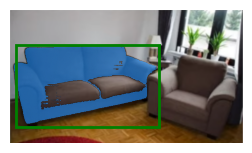

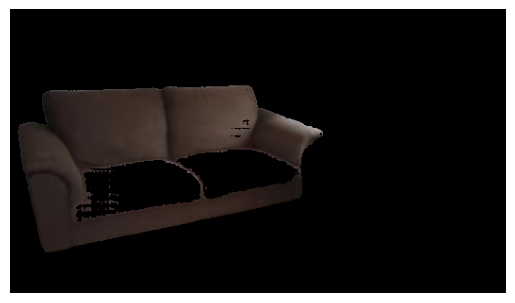

[308.7253723144531, 102.82030487060547, 512.4774169921875, 292.89263916015625]


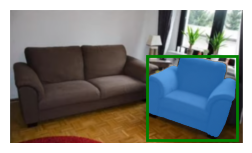

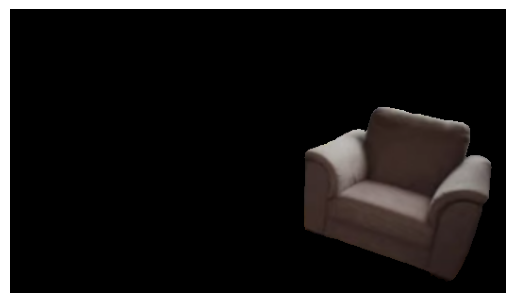

[441.73931884765625, 41.91773223876953, 499.2270202636719, 115.4874267578125]


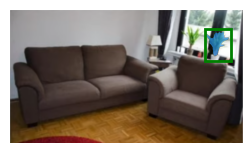

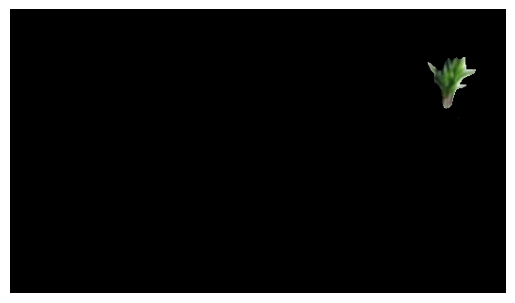

In [ ]:
n = len(masks)
print(n)
for i in range(n):
  bbox=boxes.xyxy.tolist()[i]
  input_box = np.array(bbox)
  print(bbox)
  masks, _, _ = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=True,
  )

  plt.figure(figsize=(3, 3))
  plt.imshow(image)
  show_mask(masks[i], plt.gca())
  show_box(input_box, plt.gca())
  plt.axis('off')
  # plt.title(i)
  plt.show()

  segmentation_mask = masks[i]
  binary_mask = np.where(segmentation_mask > 0.5, 1, 0)
  white_background = np.ones_like(image) * 0
  new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]
  # plt.subplot(1, n, j + 1)
  plt.imshow(new_image.astype(np.uint8))
  plt.axis('off')
  plt.savefig("/content/test.png",bbox_inches='tight',pad_inches=0)
  plt.show()
  # plt.show()
  # plt.title(i)


3
[5.533905029296875, 107.01736450195312, 786.5498046875, 581.8737182617188]


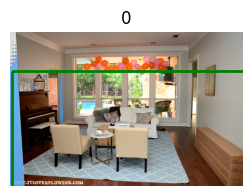

[194.72323608398438, 79.39624786376953, 301.50311279296875, 148.5516357421875]


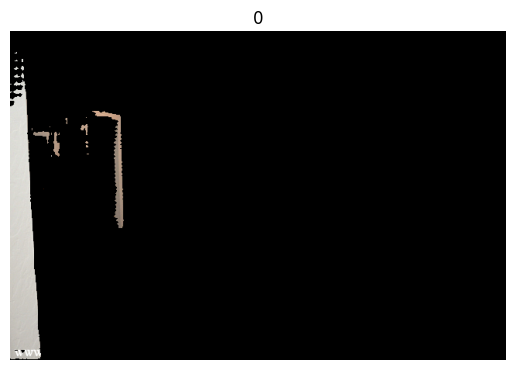

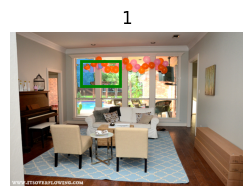

IndexError: ignored

In [ ]:
# n = len(masks)
# print(type(masks))
# print(masks.shape)
n = 3
print(n)
for i in range(3):
  bbox=boxes.xyxy.tolist()[i]
  input_box = np.array(bbox)
  print(bbox)
  masks, _, _ = predictor.predict(
      point_coords=None,
      point_labels=None,
      box=input_box[None, :],
      multimask_output=False,
  )

  plt.figure(figsize=(3, 3))
  plt.imshow(image)
  show_mask(masks, plt.gca())
  show_box(input_box, plt.gca())
  plt.axis('off')
  plt.title(i)
  plt.show()

  segmentation_mask = masks[i]
  binary_mask = np.where(segmentation_mask > 0.5, 1, 0)
  white_background = np.ones_like(image) * 0
  new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]
  # plt.subplot(1, n, j + 1)
  plt.imshow(new_image.astype(np.uint8))
  plt.axis('off')
  plt.show()
  # plt.title(i)




# for result in results:
#     names = result.names  # Boxes object for bbox outputs
#     r = result
# bbox=boxes.xyxy.tolist()[0]
# print(type(names))
# print(names[1])

# masks, _, _ = predictor.predict(
#   point_coords=None,
#   point_labels=None,
#   box=input_box[None, :],
#   multimask_output=True,
# )

# plt.figure(figsize=(10, 10))
# plt.imshow(image)
# show_mask(masks[0], plt.gca())
# show_box(input_box, plt.gca())
# plt.axis('off')
# plt.title(i)
# plt.show()

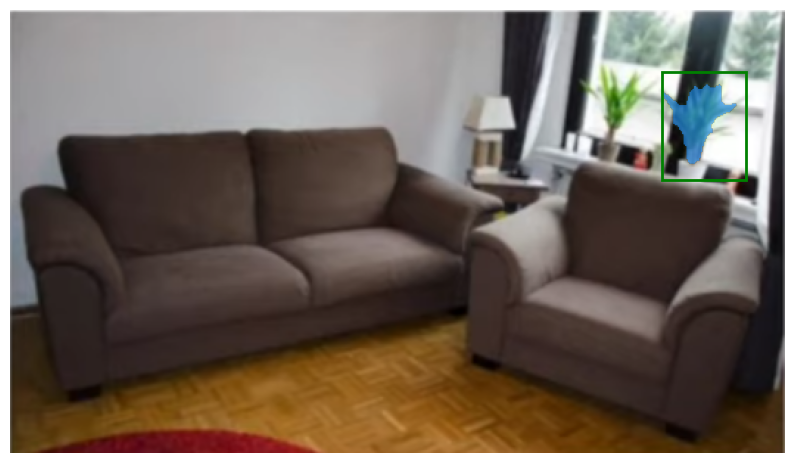

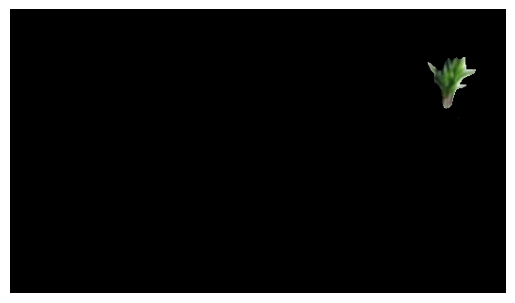

In [ ]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=True,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

segmentation_mask = masks[2]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 0

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()

In [ ]:
# from PIL import Image
# img = Image.open(segmentation_mask)
# output_folder = "/home/param/Downloads/masked_objects"
# image.save(output_folder + segmentation_mask)

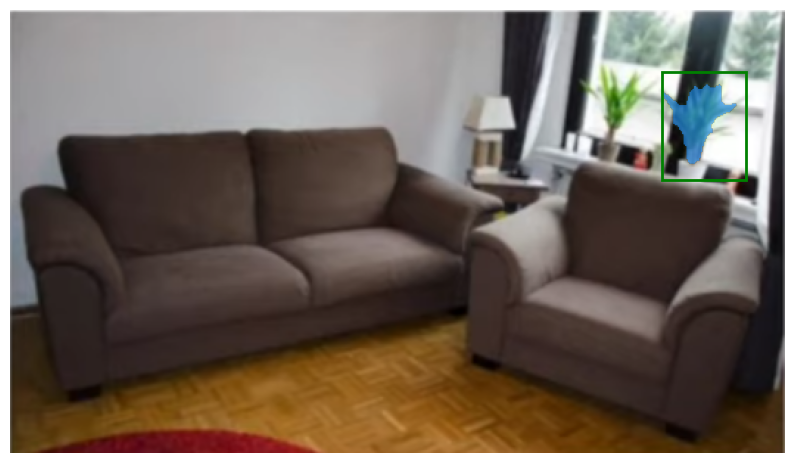

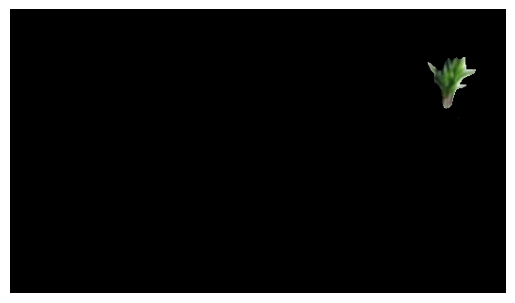

In [ ]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=True,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

segmentation_mask = masks[2]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

white_background = np.ones_like(image) * 0

new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()
# plt.savefig(panoptic_segmented_path,bbox_inches='tight',pad_inches=0)